![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [73]:
men_df = pd.read_csv('men_results.csv')
women_df = pd.read_csv('women_results.csv')

In [74]:
men_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [75]:
women_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [76]:
men_df.dtypes

Unnamed: 0     int64
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object

In [77]:
women_df.dtypes

Unnamed: 0     int64
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object

In [78]:
men_df.describe()

,Unnamed: 0,home_score,away_score
count,44353.000000,44353.000000,44353.000000
mean,22176.000000,1.740559,1.178793
std,12803.752581,1.748722,1.394580
min,0.000000,0.000000,0.000000
25%,11088.000000,1.000000,0.000000
50%,22176.000000,1.000000,1.000000
75%,33264.000000,2.000000,2.000000
max,44352.000000,31.000000,21.000000


In [79]:
women_df.describe()

,Unnamed: 0,home_score,away_score
count,4884.000000,4884.000000,4884.000000
mean,2441.500000,2.272727,1.431409
std,1410.033688,2.736377,1.974651
min,0.000000,0.000000,0.000000
25%,1220.750000,0.000000,0.000000
50%,2441.500000,1.000000,1.000000
75%,3662.250000,3.000000,2.000000
max,4883.000000,24.000000,24.000000


In [80]:
men_df['date'] = pd.to_datetime(men_df['date'])
women_df['date'] = pd.to_datetime(women_df['date'])

In [81]:
men_df = men_df.drop(columns='Unnamed: 0')
women_df = women_df.drop(columns='Unnamed: 0')

In [82]:
men_wc_2002 = men_df[
    (men_df['date'].dt.year > 2001) & 
    (men_df['tournament'] == 'FIFA World Cup')
     ].reset_index(drop=True)

In [83]:
men_wc_2002

,date,home_team,away_team,home_score,away_score,tournament
0,2002-05-31,France,Senegal,0,1,FIFA World Cup
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...
379,2022-12-10,England,France,1,2,FIFA World Cup
380,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
381,2022-12-14,France,Morocco,2,0,FIFA World Cup
382,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [84]:
women_wc_2002 = women_df[
    (women_df['date'].dt.year > 2001) &
    (women_df['tournament'] == 'FIFA World Cup')
].reset_index(drop=True)
women_wc_2002

,date,home_team,away_team,home_score,away_score,tournament
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1,2003-09-20,Norway,France,2,0,FIFA World Cup
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...
195,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
196,2019-07-02,England,United States,1,2,FIFA World Cup
197,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
198,2019-07-06,England,Sweden,1,2,FIFA World Cup


In [85]:
men_wc_2002['total_score'] = men_wc_2002['home_score'] + men_wc_2002['away_score']
men_wc_2002['group'] = 'men'
women_wc_2002['total_score'] = women_wc_2002['home_score'] + women_wc_2002['away_score']
women_wc_2002['group'] = 'women'

In [86]:
men_wc_2002.head()

,date,home_team,away_team,home_score,away_score,tournament,total_score,group
0,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


In [87]:
both = pd.concat([men_wc_2002, women_wc_2002], axis=0, ignore_index=True)

In [88]:
both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         584 non-null    datetime64[ns]
 1   home_team    584 non-null    object        
 2   away_team    584 non-null    object        
 3   home_score   584 non-null    int64         
 4   away_score   584 non-null    int64         
 5   tournament   584 non-null    object        
 6   total_score  584 non-null    int64         
 7   group        584 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 36.6+ KB


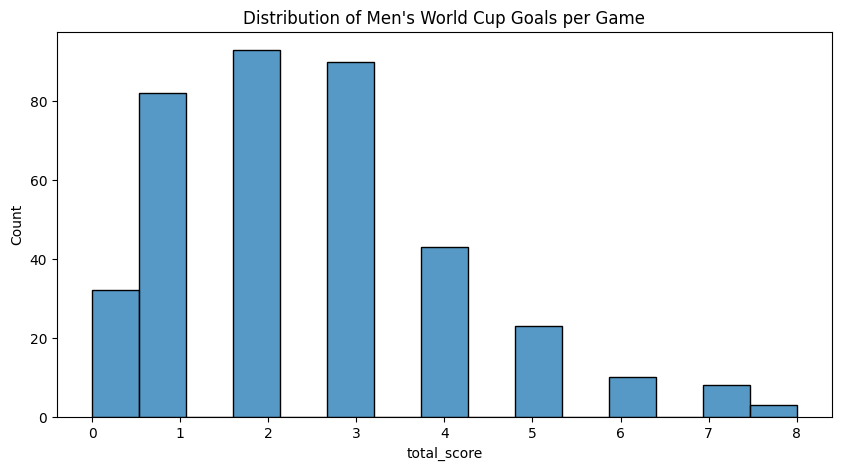

In [89]:
plt.figure(figsize=(10,5))

sns.histplot(data=men_wc_2002, x='total_score')
plt.title("Distribution of Men's World Cup Goals per Game")
plt.show()

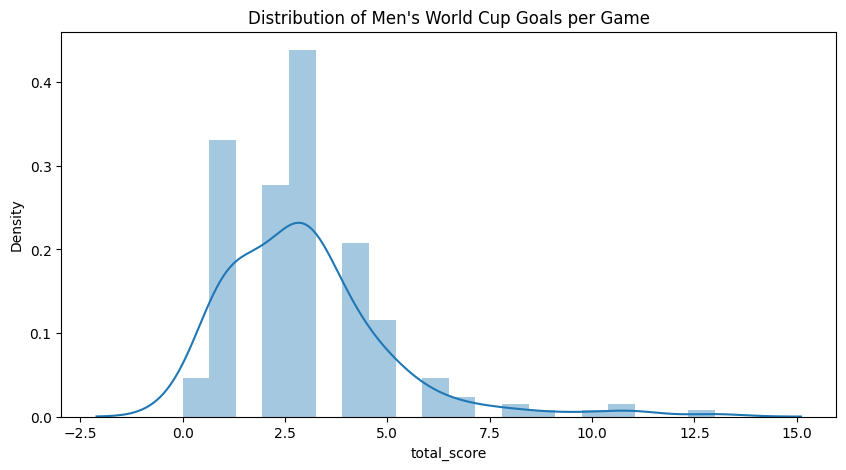

In [93]:
plt.figure(figsize=(10,5))

sns.distplot(women_wc_2002['total_score'])
plt.title("Distribution of Men's World Cup Goals per Game")
plt.show()

I will be using the Mann-Whitney U Test to compare the difference between the total number of goals in mens vs. womens world cup games. 


In [69]:
results_scipy = mannwhitneyu(x=women_wc_2002["total_score"],
                             y=men_wc_2002["total_score"],
                             alternative="greater")

p_val = round(results_scipy.pvalue, 4)

if p_val <= 0.01:
    result = 'Reject the null hypothesis. The mean number of goals scored in womens international soccer matches is greater than mens.'
else:
    result = 'Fail to reject the null hypothesis. The mean number of goals scored in womens international soccer is the same as mens.'
    
result_dict = {
    'p_val': p_val,
    'result': result
}
print(result_dict)

The results of the Mann-Whitney U Test suggest that there is strong evidence to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's, and accept the alternative hypothesis that the mean number of goals scored in women's international soccer matches is greater than men's.